In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import utils.datasets as ds
from utils import matrix,clustering
import pickle5 as pickle
datapath = '../Data'
figpath = '../Figures'


In [14]:
def get_data(file):
    with open(file, 'rb') as input:
        data = pickle.load(input)
    return data 

outdict = get_data(f'{datapath}/resamples/lininterp/finallabels.pkl')
finallabels = outdict['finallabels']
cooccurrence = outdict['cooccurrence']

In [3]:
# G = nx.Graph()
G = nx.read_gml(f'{datapath}/karate/karate.gml', label='id')

In [4]:
adj = nx.adjacency_matrix(G)

{'group_key': [(0, 16), (1, 0), (2, 18), (3, 0), (4, 31), (5, 13), (6, 3), (7, 6), (8, 20), (9, 1), (10, 11), (11, 4), (12, 25), (13, 15), (14, 22), (15, 6), (16, 18), (17, 25), (18, 3), (19, 33), (20, 31), (21, 10), (22, 5), (23, 15), (24, 6), (25, 11), (26, 4), (27, 24), (28, 28), (29, 14), (30, 27), (31, 30), (32, 8), (33, 15)], 'affinity_matrix': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'n_clusters': [2, 3, 4, 5, 6], 'labels': array([[0., 1., 0., 1., 0.],
       [0., 1., 3., 0., 3.],
       [1., 2., 2., 3., 1.],
       [0., 1., 3., 0., 3.],
       [1., 0., 1., 2., 4.],
       [0., 1., 3., 0., 5.],
       [0., 1., 3., 0., 5.],
       [0., 1., 0., 1., 0.],
       [1., 2., 2., 3., 1.],
       [0., 1., 3., 0., 5.],
       [0., 1., 3., 0., 3.],
       [0., 1., 0., 1., 0.],
       [1., 0., 

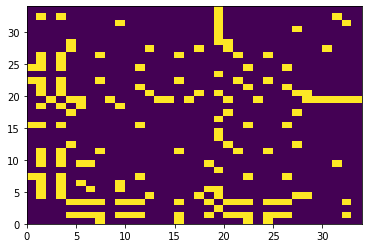

In [5]:
df, temp_adj = ds.resampled_graph(adj)
res = clustering.cluster_data(df, temp_adj)
print(res)
plt.pcolormesh(temp_adj)

In [10]:
# plt.pcolormesh(adj.todense())

In [11]:
# clustering = cluster.SpectralClustering(n_clusters = 3, affinity='precomputed')
# labels = clustering.fit_predict(adj.todense()) 

# fig, ax = plt.subplots()
# matrix.plot_ordered(adj.todense(), labels, ax)

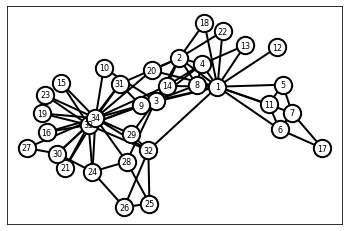

In [42]:
# pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}
options = {
    "font_size": 8,
    "node_size": 300,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
nx.draw_networkx(G, **options)
plt.savefig(f'{figpath}/resamples/karate/networkalt.eps')

In [3]:
num_trials=100
slug = 'histogram_synth'
folder = f'{datapath}/resamples/{slug}'

if __name__ == '__main__':
    synth_data = ds.synthetic_paindata() # Generate the synthetic dataset once
    if not os.path.isdir(folder):
        os.mkdir(folder)
    for trial in range(num_trials):
        savename = f'{folder}/test{trial}.pkl'
        data = ds.resampled_data(data=synth_data) # Resample the dataset regularly
        res = clustering.cluster_data(data, transform)
        with open(savename, 'wb') as fp:
            pickle.dump(res, fp, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'os' is not defined

In [ ]:
plt.pcolormesh(finallabels[np.argsort(finallabels[:, 0])], cmap='rainbow')
# plt.pcolormesh(sortlabels, cmap='rainbow')
# for i, l in enumerate(finallabels[:, [0, 1]]):
#     print(i+1, l)

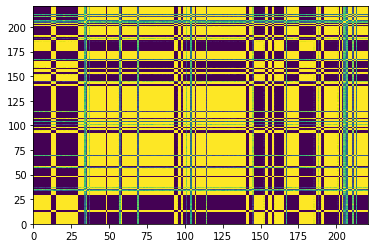

In [4]:
plt.pcolormesh(matrix.reorder_matrix(cooccurrence[:, :, 0],
                                     matrix.communities(finallabels[np.argsort(finallabels[:, 0]), 0])))

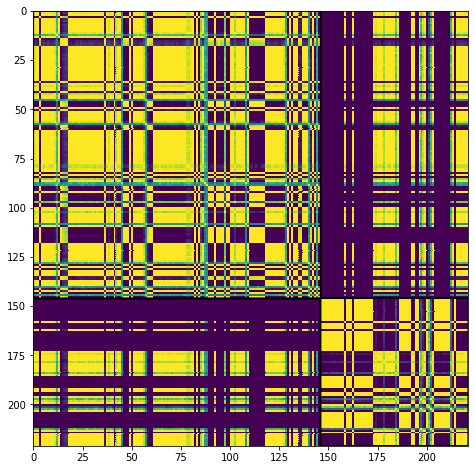

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
# finallabels = finallabels[np.argsort(finallabels[:, 0])]
matrix.plot_ordered(cooccurrence[:, :, 1], matrix.communities(finallabels[:, 0]), ax)